Wind Turbine SCADA Performance Analysis
Task 1: Exploratory Data Analysis (EDA)


WIND TURBINE SCADA DATASET - BASIC INFORMATION

Dataset Shape: (50530, 5)
Total Records: 50,530

Column Names:
['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

First 5 Rows:
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  

Data Types:
Date/Time                         object
LV Ac

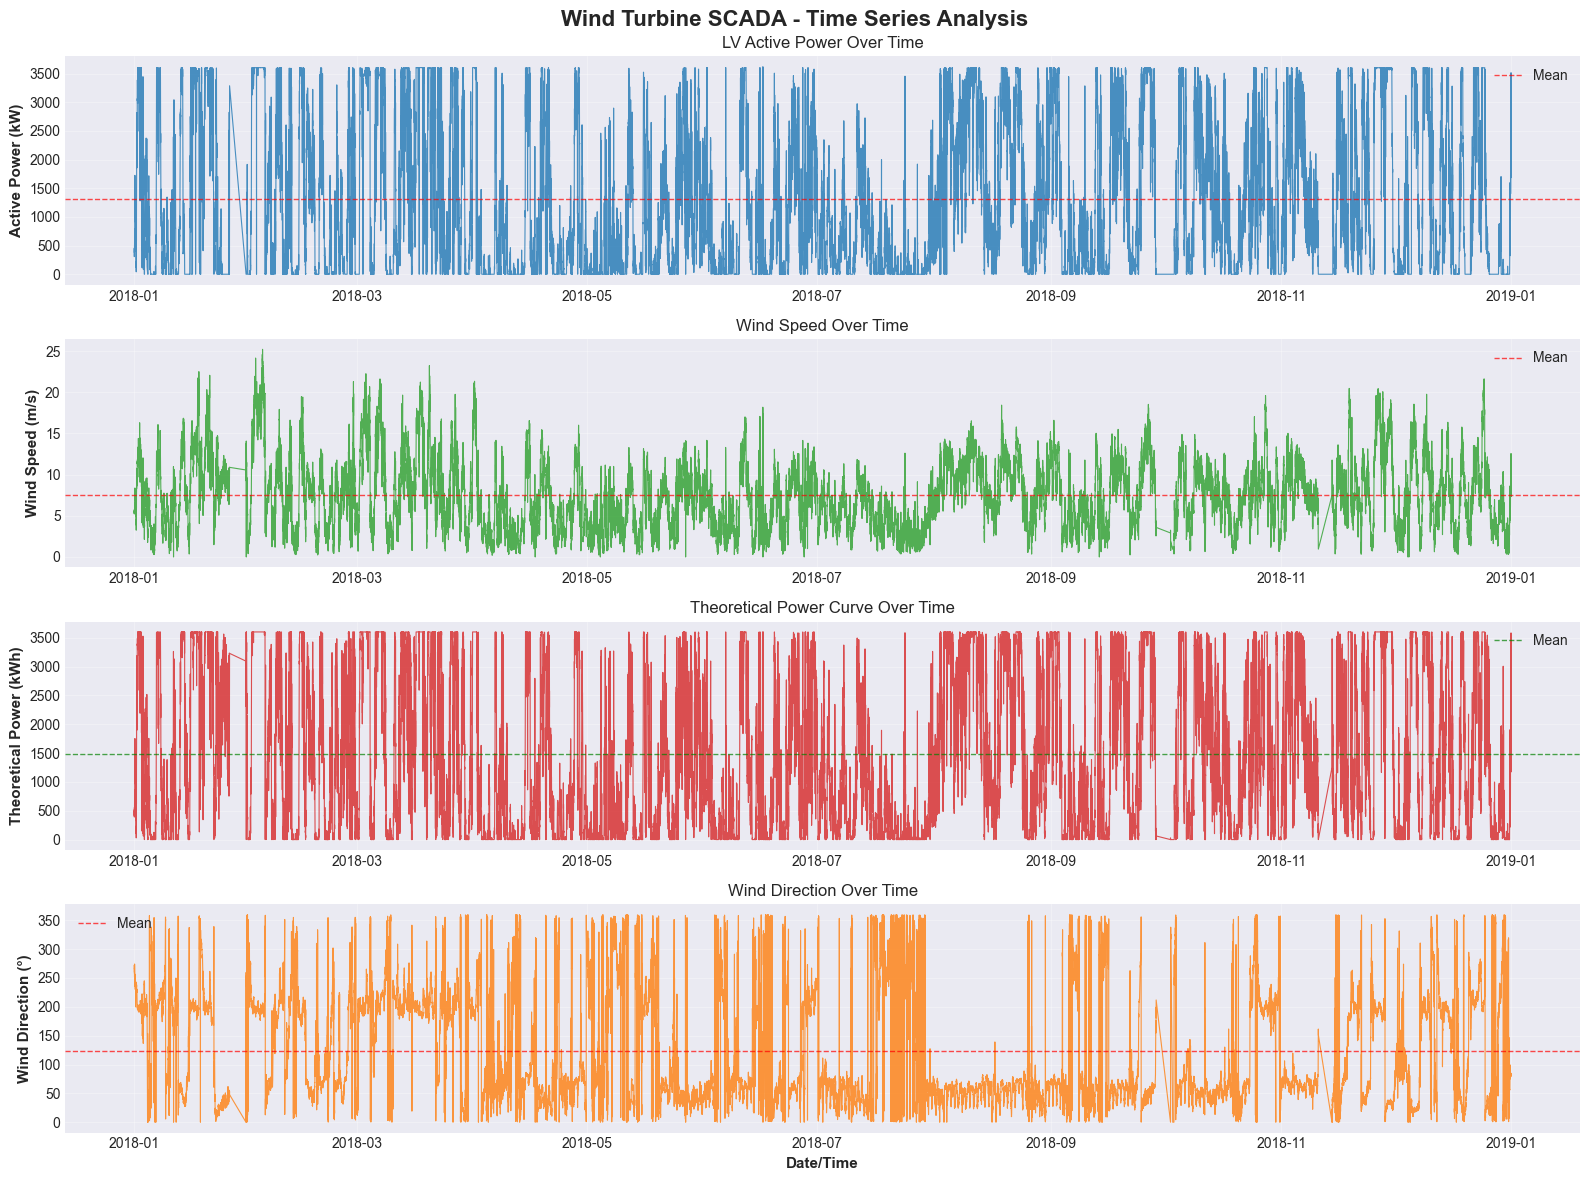

✓ Saved: task1_power_curve.png


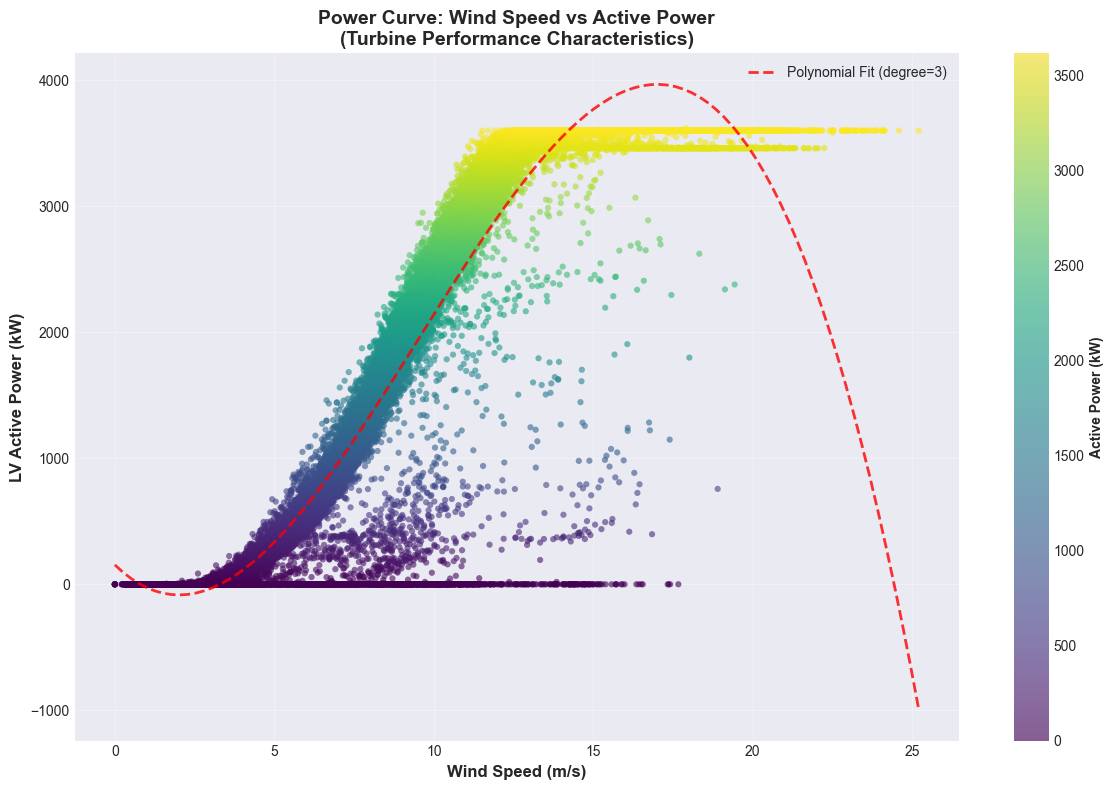

✓ Saved: task1_distributions.png


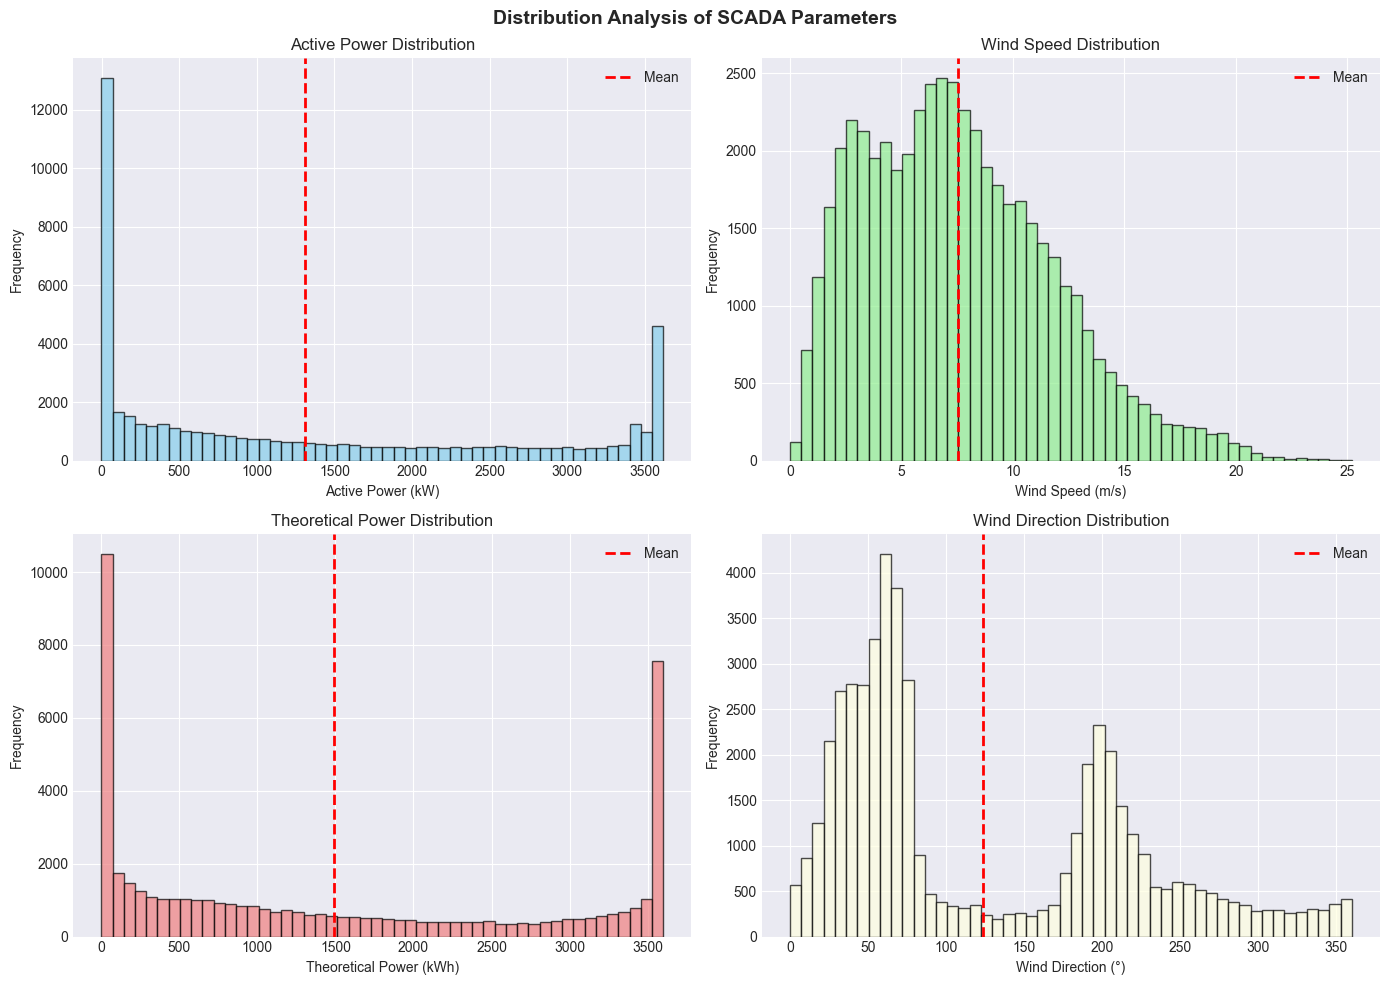

✓ Saved: task1_correlation_matrix.png


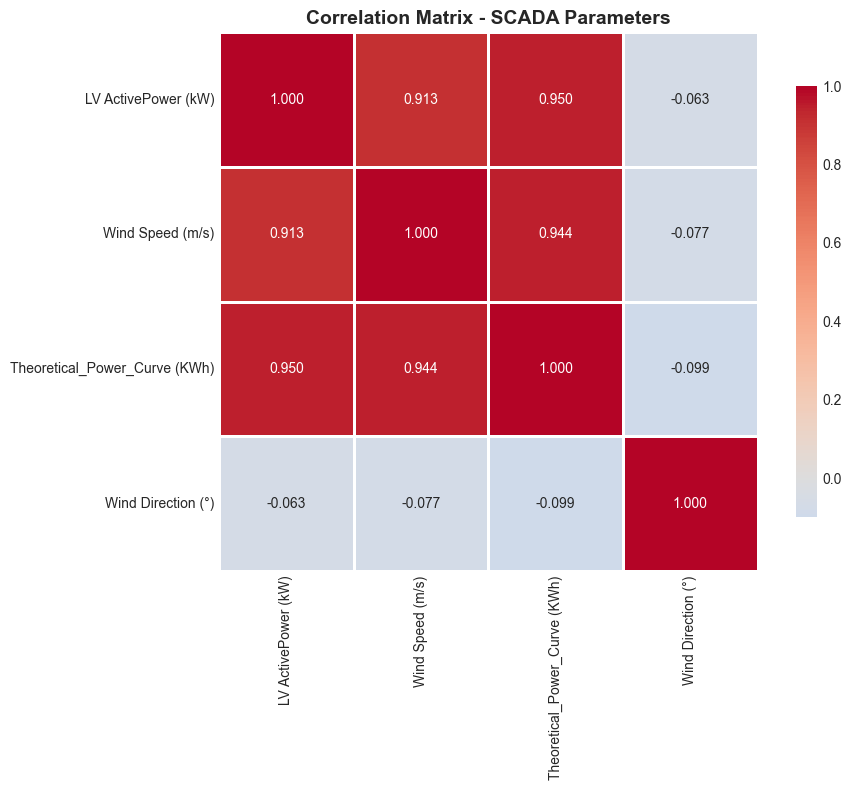


TASK 1 - EDA SUMMARY REPORT

Dataset Overview:
  • Total Records: 50,530
  • Time Period: 2018-01-01 00:00:00 to 2018-12-31 23:50:00
  • Duration: 364 days
  • Missing Values: 0

Key Performance Metrics:
  • Average Active Power: 1307.68 kW
  • Average Wind Speed: 7.56 m/s
  • Average Theoretical Power: 1492.18 kWh
  • Performance Ratio: 87.64%

Anomaly Detection:
  • Total Anomalies: 228
  • Underperformance Instances: 36061 (71.37%)

Visualizations Generated:
  ✓ task1_timeseries_trends.png
  ✓ task1_power_curve.png
  ✓ task1_distributions.png
  ✓ task1_correlation_matrix.png

TASK 1 COMPLETED SUCCESSFULLY!


In [4]:
# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD DATASET
# ============================================================================
# Load the dataset
df = pd.read_csv('T1.csv')  

# Display basic information
print("=" * 80)
print("WIND TURBINE SCADA DATASET - BASIC INFORMATION")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print(f"\nColumn Names:")
print(df.columns.tolist())
print(f"\nFirst 5 Rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nDataset Info:")
print(df.info())

# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================
print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Convert Date/Time to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Sort by datetime
df = df.sort_values('Date/Time').reset_index(drop=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# ============================================================================
# 3. STATISTICAL SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Custom statistics
print("\n" + "-" * 80)
print("DETAILED STATISTICS FOR EACH VARIABLE")
print("-" * 80)

variables = {
    'LV ActivePower (kW)': 'Active Power',
    'Wind Speed (m/s)': 'Wind Speed',
    'Theoretical_Power_Curve (KWh)': 'Theoretical Power',
    'Wind Direction (°)': 'Wind Direction'
}

for col, name in variables.items():
    print(f"\n{name}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

# Performance Ratio
performance_ratio = (df['LV ActivePower (kW)'].mean() / 
                    df['Theoretical_Power_Curve (KWh)'].mean()) * 100
print(f"\n{'='*80}")
print(f"OVERALL PERFORMANCE RATIO: {performance_ratio:.2f}%")
print(f"{'='*80}")

# ============================================================================
# 4. ANOMALY DETECTION
# ============================================================================
print("\n" + "=" * 80)
print("ANOMALY DETECTION (Using 3-Sigma Rule)")
print("=" * 80)

anomaly_summary = {}

for col, name in variables.items():
    mean = df[col].mean()
    std = df[col].std()
    
    # Define anomalies as values beyond 3 standard deviations
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    anomalies = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    anomaly_count = len(anomalies)
    anomaly_percentage = (anomaly_count / len(df)) * 100
    
    anomaly_summary[name] = {
        'count': anomaly_count,
        'percentage': anomaly_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{name}:")
    print(f"  Anomalies Detected: {anomaly_count} ({anomaly_percentage:.2f}%)")
    print(f"  Normal Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Detect underperformance (Actual < Theoretical)
underperformance = df[df['LV ActivePower (kW)'] < df['Theoretical_Power_Curve (KWh)']]
print(f"\n{'='*80}")
print(f"UNDERPERFORMANCE INSTANCES: {len(underperformance)} ({len(underperformance)/len(df)*100:.2f}%)")
print(f"{'='*80}")

# ============================================================================
# 5. TIME SERIES VISUALIZATION
# ============================================================================
print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS...")
print("=" * 80)

# Create figure with subplots for all four parameters
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
fig.suptitle('Wind Turbine SCADA - Time Series Analysis', fontsize=16, fontweight='bold')

# Plot 1: Active Power
axes[0].plot(df['Date/Time'], df['LV ActivePower (kW)'], 
             color='#1f77b4', linewidth=0.8, alpha=0.8)
axes[0].set_ylabel('Active Power (kW)', fontsize=11, fontweight='bold')
axes[0].set_title('LV Active Power Over Time', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df['LV ActivePower (kW)'].mean(), 
                color='r', linestyle='--', linewidth=1, label='Mean', alpha=0.7)
axes[0].legend()

# Plot 2: Wind Speed
axes[1].plot(df['Date/Time'], df['Wind Speed (m/s)'], 
             color='#2ca02c', linewidth=0.8, alpha=0.8)
axes[1].set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
axes[1].set_title('Wind Speed Over Time', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=df['Wind Speed (m/s)'].mean(), 
                color='r', linestyle='--', linewidth=1, label='Mean', alpha=0.7)
axes[1].legend()

# Plot 3: Theoretical Power
axes[2].plot(df['Date/Time'], df['Theoretical_Power_Curve (KWh)'], 
             color='#d62728', linewidth=0.8, alpha=0.8)
axes[2].set_ylabel('Theoretical Power (kWh)', fontsize=11, fontweight='bold')
axes[2].set_title('Theoretical Power Curve Over Time', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=df['Theoretical_Power_Curve (KWh)'].mean(), 
                color='g', linestyle='--', linewidth=1, label='Mean', alpha=0.7)
axes[2].legend()

# Plot 4: Wind Direction
axes[3].plot(df['Date/Time'], df['Wind Direction (°)'], 
             color='#ff7f0e', linewidth=0.8, alpha=0.8)
axes[3].set_ylabel('Wind Direction (°)', fontsize=11, fontweight='bold')
axes[3].set_xlabel('Date/Time', fontsize=11, fontweight='bold')
axes[3].set_title('Wind Direction Over Time', fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=df['Wind Direction (°)'].mean(), 
                color='r', linestyle='--', linewidth=1, label='Mean', alpha=0.7)
axes[3].legend()

plt.tight_layout()
plt.savefig('task1_timeseries_trends.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task1_timeseries_trends.png")
plt.show()

# ============================================================================
# 6. POWER CURVE ANALYSIS (Scatter Plot)
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with color mapping based on power output
scatter = ax.scatter(df['Wind Speed (m/s)'], 
                     df['LV ActivePower (kW)'],
                     c=df['LV ActivePower (kW)'], 
                     cmap='viridis',
                     alpha=0.6, 
                     s=20,
                     edgecolors='none')

ax.set_xlabel('Wind Speed (m/s)', fontsize=12, fontweight='bold')
ax.set_ylabel('LV Active Power (kW)', fontsize=12, fontweight='bold')
ax.set_title('Power Curve: Wind Speed vs Active Power\n(Turbine Performance Characteristics)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Active Power (kW)', fontsize=10, fontweight='bold')

# Add trend line
z = np.polyfit(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], 3)
p = np.poly1d(z)
wind_speed_range = np.linspace(df['Wind Speed (m/s)'].min(), 
                                df['Wind Speed (m/s)'].max(), 100)
ax.plot(wind_speed_range, p(wind_speed_range), 
        'r--', linewidth=2, label='Polynomial Fit (degree=3)', alpha=0.8)
ax.legend()

plt.tight_layout()
plt.savefig('task1_power_curve.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task1_power_curve.png")
plt.show()

# ============================================================================
# 7. ADDITIONAL VISUALIZATIONS
# ============================================================================

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Analysis of SCADA Parameters', fontsize=14, fontweight='bold')

# Active Power Distribution
axes[0, 0].hist(df['LV ActivePower (kW)'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Active Power (kW)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Active Power Distribution')
axes[0, 0].axvline(df['LV ActivePower (kW)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].legend()

# Wind Speed Distribution
axes[0, 1].hist(df['Wind Speed (m/s)'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Wind Speed (m/s)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Wind Speed Distribution')
axes[0, 1].axvline(df['Wind Speed (m/s)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 1].legend()

# Theoretical Power Distribution
axes[1, 0].hist(df['Theoretical_Power_Curve (KWh)'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Theoretical Power (kWh)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Theoretical Power Distribution')
axes[1, 0].axvline(df['Theoretical_Power_Curve (KWh)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 0].legend()

# Wind Direction Distribution
axes[1, 1].hist(df['Wind Direction (°)'], bins=50, color='lightyellow', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Wind Direction (°)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Wind Direction Distribution')
axes[1, 1].axvline(df['Wind Direction (°)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('task1_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task1_distributions.png")
plt.show()

# Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 8))
correlation_cols = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 
                    'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
correlation_matrix = df[correlation_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - SCADA Parameters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('task1_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task1_correlation_matrix.png")
plt.show()

# ============================================================================
# 8. SUMMARY REPORT
# ============================================================================
print("\n" + "=" * 80)
print("TASK 1 - EDA SUMMARY REPORT")
print("=" * 80)
print(f"""
Dataset Overview:
  • Total Records: {len(df):,}
  • Time Period: {df['Date/Time'].min()} to {df['Date/Time'].max()}
  • Duration: {(df['Date/Time'].max() - df['Date/Time'].min()).days} days
  • Missing Values: {df.isnull().sum().sum()}
  
Key Performance Metrics:
  • Average Active Power: {df['LV ActivePower (kW)'].mean():.2f} kW
  • Average Wind Speed: {df['Wind Speed (m/s)'].mean():.2f} m/s
  • Average Theoretical Power: {df['Theoretical_Power_Curve (KWh)'].mean():.2f} kWh
  • Performance Ratio: {performance_ratio:.2f}%
  
Anomaly Detection:
  • Total Anomalies: {sum([v['count'] for v in anomaly_summary.values()])}
  • Underperformance Instances: {len(underperformance)} ({len(underperformance)/len(df)*100:.2f}%)
  
Visualizations Generated:
  ✓ task1_timeseries_trends.png
  ✓ task1_power_curve.png
  ✓ task1_distributions.png
  ✓ task1_correlation_matrix.png
""")

print("=" * 80)
print("TASK 1 COMPLETED SUCCESSFULLY!")
print("=" * 80)